In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="Latin America") & (data.business_area_name=="A00 - Equipment")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.head()

,business_area_name,region_name,date,sales
63,A00 - Equipment,Latin America,2017-01-01,2117474.85
84,A00 - Equipment,Latin America,2017-02-01,1015939.44
100,A00 - Equipment,Latin America,2017-03-01,2124247.59
141,A00 - Equipment,Latin America,2017-04-01,807028.31
154,A00 - Equipment,Latin America,2017-05-01,941404.89


,date,sales
0,2017-01-01,2117474.85
1,2017-02-01,1015939.44
2,2017-03-01,2124247.59
3,2017-04-01,807028.31
4,2017-05-01,941404.89


In [3]:
data.shape

(60, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

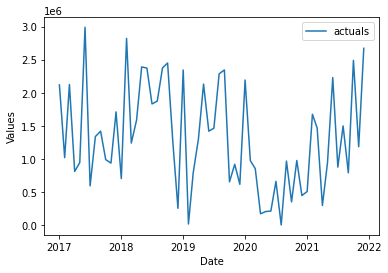

In [4]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

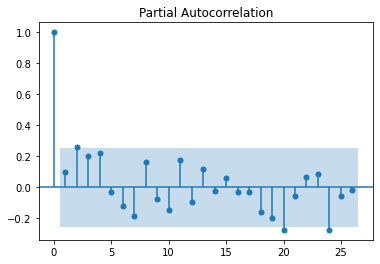

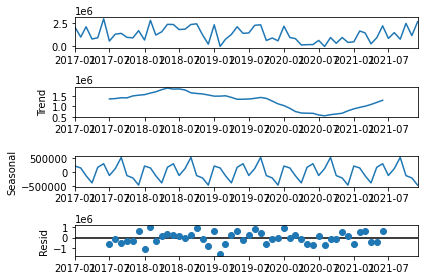

In [5]:
f.plot_pacf(lags=26)
plt.show()

f.seasonal_decompose().plot()
plt.show()

In [6]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

Epoch 1/200
1/1 [==============================] - 16s 16s/step - loss: 0.3018 - val_loss: 0.4591
Epoch 2/200
1/1 [==============================] - 0s 106ms/step - loss: 0.2940 - val_loss: 0.4450
Epoch 3/200
1/1 [==============================] - 0s 114ms/step - loss: 0.2806 - val_loss: 0.4177
Epoch 4/200
1/1 [==============================] - 0s 117ms/step - loss: 0.2591 - val_loss: 0.3625
Epoch 5/200
1/1 [==============================] - 0s 97ms/step - loss: 0.2313 - val_loss: 0.2696
Epoch 6/200
1/1 [==============================] - 0s 98ms/step - loss: 0.2076 - val_loss: 0.2177
Epoch 7/200
1/1 [==============================] - 0s 93ms/step - loss: 0.2005 - val_loss: 0.2316
Epoch 8/200
1/1 [==============================] - 0s 96ms/step - loss: 0.1722 - val_loss: 0.2693
Epoch 9/200
1/1 [==============================] - 0s 97ms/step - loss: 0.1668 - val_loss: 0.2953
Epoch 10/200
1/1 [==============================] - 0s 116ms/step - loss: 0.1664 - val_loss: 0.3060
Epoch 11/200
1/

1/1 [==============================] - 0s 126ms/step - loss: 0.1563 - val_loss: 0.2675
Epoch 84/200
1/1 [==============================] - 0s 103ms/step - loss: 0.1560 - val_loss: 0.2682
Epoch 85/200
1/1 [==============================] - 0s 102ms/step - loss: 0.1559 - val_loss: 0.2675
Epoch 86/200
1/1 [==============================] - 0s 121ms/step - loss: 0.1561 - val_loss: 0.2687
Epoch 87/200
1/1 [==============================] - 0s 104ms/step - loss: 0.1560 - val_loss: 0.2707
Epoch 88/200
1/1 [==============================] - 0s 100ms/step - loss: 0.1564 - val_loss: 0.2668
Epoch 89/200
1/1 [==============================] - 0s 101ms/step - loss: 0.1559 - val_loss: 0.2659
Epoch 90/200
1/1 [==============================] - 0s 99ms/step - loss: 0.1562 - val_loss: 0.2687
Epoch 91/200
1/1 [==============================] - 0s 104ms/step - loss: 0.1560 - val_loss: 0.2689
Epoch 92/200
1/1 [==============================] - 0s 107ms/step - loss: 0.1560 - val_loss: 0.2666
Epoch 93/200
1

1/1 [==============================] - 0s 104ms/step - loss: 0.1562 - val_loss: 0.2656
Epoch 165/200
1/1 [==============================] - 0s 111ms/step - loss: 0.1562 - val_loss: 0.2667
Epoch 166/200
1/1 [==============================] - 0s 105ms/step - loss: 0.1563 - val_loss: 0.2658
Epoch 167/200
1/1 [==============================] - 0s 100ms/step - loss: 0.1562 - val_loss: 0.2660
Epoch 168/200
1/1 [==============================] - 0s 104ms/step - loss: 0.1563 - val_loss: 0.2705
Epoch 169/200
1/1 [==============================] - 0s 111ms/step - loss: 0.1560 - val_loss: 0.2710
Epoch 170/200
1/1 [==============================] - 0s 112ms/step - loss: 0.1561 - val_loss: 0.2700
Epoch 171/200
1/1 [==============================] - 0s 98ms/step - loss: 0.1562 - val_loss: 0.2671
Epoch 172/200
1/1 [==============================] - 0s 105ms/step - loss: 0.1561 - val_loss: 0.2667
Epoch 173/200
1/1 [==============================] - 0s 106ms/step - loss: 0.1559 - val_loss: 0.2677
Epoch

Epoch 46/200
2/2 [==============================] - 0s 114ms/step - loss: 0.1677 - val_loss: 0.2445
Epoch 47/200
2/2 [==============================] - 0s 111ms/step - loss: 0.1674 - val_loss: 0.2437
Epoch 48/200
2/2 [==============================] - 0s 116ms/step - loss: 0.1673 - val_loss: 0.2451
Epoch 49/200
2/2 [==============================] - 0s 111ms/step - loss: 0.1671 - val_loss: 0.2473
Epoch 50/200
2/2 [==============================] - 0s 111ms/step - loss: 0.1675 - val_loss: 0.2458
Epoch 51/200
2/2 [==============================] - 0s 114ms/step - loss: 0.1671 - val_loss: 0.2388
Epoch 52/200
2/2 [==============================] - 0s 112ms/step - loss: 0.1677 - val_loss: 0.2344
Epoch 53/200
2/2 [==============================] - 0s 112ms/step - loss: 0.1672 - val_loss: 0.2372
Epoch 54/200
2/2 [==============================] - 0s 115ms/step - loss: 0.1670 - val_loss: 0.2434
Epoch 55/200
2/2 [==============================] - 0s 111ms/step - loss: 0.1673 - val_loss: 0.2521


2/2 [==============================] - 0s 111ms/step - loss: 0.1670 - val_loss: 0.2436
Epoch 128/200
2/2 [==============================] - 0s 108ms/step - loss: 0.1671 - val_loss: 0.2435
Epoch 129/200
2/2 [==============================] - 0s 108ms/step - loss: 0.1673 - val_loss: 0.2449
Epoch 130/200
2/2 [==============================] - 0s 110ms/step - loss: 0.1672 - val_loss: 0.2463
Epoch 131/200
2/2 [==============================] - 0s 116ms/step - loss: 0.1671 - val_loss: 0.2500
Epoch 132/200
2/2 [==============================] - 0s 115ms/step - loss: 0.1666 - val_loss: 0.2578
Epoch 133/200
2/2 [==============================] - 0s 110ms/step - loss: 0.1672 - val_loss: 0.2635
Epoch 134/200
2/2 [==============================] - 0s 113ms/step - loss: 0.1683 - val_loss: 0.2662
Epoch 135/200
2/2 [==============================] - 0s 109ms/step - loss: 0.1687 - val_loss: 0.2588
Epoch 136/200
2/2 [==============================] - 0s 106ms/step - loss: 0.1677 - val_loss: 0.2502
Epoc

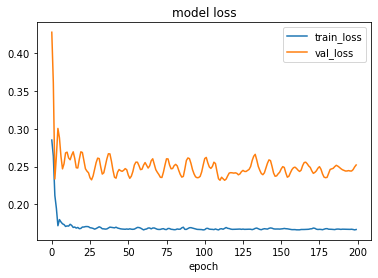

In [ ]:
f.manual_forecast(call_me='lstm',
                  lags=24,
                  batch_size=16,
                  epochs=200,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

In [ ]:
f.plot_test_set(ci=True)

In [ ]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [ ]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

In [ ]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

In [ ]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')